## Forecasting

In [4]:
# TimeXer

import subprocess, os, re, pandas as pd

pred_lengths = [24, 48, 96, 168]
records = []

for pred in pred_lengths:
    model_id = f"TimeXer_168_{pred}"
    res = subprocess.run(
        f"bash scripts/TimeXer.sh --pred_len {pred} --model_id {model_id}",
        shell=True, capture_output=True, text=True,
        env={**os.environ, "CUDA_VISIBLE_DEVICES": "0"}
    )
    m = re.search(r"mse[:\s]*([\d.eE+-]+).*mae[:\s]*([\d.eE+-]+)", res.stdout, re.I | re.S)
    if m:
        mse, mae = map(float, m.groups())
        records.append({"model_id": model_id, "MSE": mse, "MAE": mae})

df1 = pd.DataFrame(records)
df1

,model_id,MSE,MAE
0,TimeXer_168_24,0.114065,0.207589
1,TimeXer_168_48,0.152094,0.243412
2,TimeXer_168_96,0.187396,0.273756
3,TimeXer_168_168,0.191931,0.277596


In [5]:
# iTransformer

import subprocess, os, re, pandas as pd

pred_lengths = [24, 48, 96, 168]
records = []

for pred in pred_lengths:
    model_id = f"iTransformer_168_{pred}"
    res = subprocess.run(
        f"bash scripts/iTransformer.sh --pred_len {pred} --model_id {model_id}",
        shell=True, capture_output=True, text=True,
        env={**os.environ, "CUDA_VISIBLE_DEVICES": "0"}
    )
    m = re.search(r"mse[:\s]*([\d.eE+-]+).*mae[:\s]*([\d.eE+-]+)", res.stdout, re.I | re.S)
    if m:
        mse, mae = map(float, m.groups())
        records.append({"model_id": model_id, "MSE": mse, "MAE": mae})

df2 = pd.DataFrame(records)
df2

,model_id,MSE,MAE
0,iTransformer_168_24,0.211726,0.301978
1,iTransformer_168_48,0.217138,0.303003
2,iTransformer_168_96,0.235988,0.317595
3,iTransformer_168_168,0.239717,0.321965


In [6]:
# PatchTST

import subprocess, os, re, pandas as pd

pred_lengths = [24, 48, 96, 168]
records = []

for pred in pred_lengths:
    model_id = f"PatchTST_168_{pred}"
    res = subprocess.run(
        f"bash scripts/PatchTST.sh --pred_len {pred} --model_id {model_id}",
        shell=True, capture_output=True, text=True,
        env={**os.environ, "CUDA_VISIBLE_DEVICES": "0"}
    )
    m = re.search(r"mse[:\s]*([\d.eE+-]+).*mae[:\s]*([\d.eE+-]+)", res.stdout, re.I | re.S)
    if m:
        mse, mae = map(float, m.groups())
        records.append({"model_id": model_id, "MSE": mse, "MAE": mae})

df3 = pd.DataFrame(records)
df3

,model_id,MSE,MAE
0,PatchTST_168_24,0.288006,0.379635
1,PatchTST_168_48,0.269307,0.360139
2,PatchTST_168_96,0.251131,0.330213
3,PatchTST_168_168,0.273937,0.368002


In [7]:
# DLinear

import subprocess, os, re, pandas as pd

pred_lengths = [24, 48, 96, 168]
records = []

for pred in pred_lengths:
    model_id = f"DLinear_168_{pred}"
    res = subprocess.run(
        f"bash scripts/DLinear.sh --pred_len {pred} --model_id {model_id}",
        shell=True, capture_output=True, text=True,
        env={**os.environ, "CUDA_VISIBLE_DEVICES": "0"}
    )
    m = re.search(r"mse[:\s]*([\d.eE+-]+).*mae[:\s]*([\d.eE+-]+)", res.stdout, re.I | re.S)
    if m:
        mse, mae = map(float, m.groups())
        records.append({"model_id": model_id, "MSE": mse, "MAE": mae})

df4 = pd.DataFrame(records)
df4

,model_id,MSE,MAE
0,DLinear_168_24,0.118004,0.208651
1,DLinear_168_48,0.146829,0.234402
2,DLinear_168_96,0.171785,0.253947
3,DLinear_168_168,0.186270,0.262764


In [8]:
# SCINet

import subprocess, os, re, pandas as pd

pred_lengths = [24, 48, 96, 168]
records = []

for pred in pred_lengths:
    model_id = f"SCINet_168_{pred}"
    res = subprocess.run(
        f"bash scripts/SCINet.sh --pred_len {pred} --model_id {model_id}",
        shell=True, capture_output=True, text=True,
        env={**os.environ, "CUDA_VISIBLE_DEVICES": "0"}
    )
    m = re.search(r"mse[:\s]*([\d.eE+-]+).*mae[:\s]*([\d.eE+-]+)", res.stdout, re.I | re.S)
    if m:
        mse, mae = map(float, m.groups())
        records.append({"model_id": model_id, "MSE": mse, "MAE": mae})

df5 = pd.DataFrame(records)
df5

,model_id,MSE,MAE
0,SCINet_168_24,0.117144,0.209942
1,SCINet_168_48,0.154171,0.247108
2,SCINet_168_96,0.205313,0.288181
3,SCINet_168_168,0.204434,0.289001


In [9]:
# Autoformer

import subprocess, os, re, pandas as pd

pred_lengths = [24, 48, 96, 168]
records = []

for pred in pred_lengths:
    model_id = f"Autoformer_168_{pred}"
    res = subprocess.run(
        f"bash scripts/Autoformer.sh --pred_len {pred} --model_id {model_id}",
        shell=True, capture_output=True, text=True,
        env={**os.environ, "CUDA_VISIBLE_DEVICES": "0"}
    )
    m = re.search(r"mse[:\s]*([\d.eE+-]+).*mae[:\s]*([\d.eE+-]+)", res.stdout, re.I | re.S)
    if m:
        mse, mae = map(float, m.groups())
        records.append({"model_id": model_id, "MSE": mse, "MAE": mae})

df6 = pd.DataFrame(records)
df6

,model_id,MSE,MAE
0,Autoformer_168_24,0.153309,0.261341
1,Autoformer_168_48,0.175002,0.268218
2,Autoformer_168_96,0.191274,0.279762
3,Autoformer_168_168,0.201116,0.284607


In [10]:
import pandas as pd

df_list = [df1, df2, df3, df4, df5, df6]

df = pd.concat(df_list, ignore_index=True)

df.to_csv('pred_len.csv', index=False)

In [11]:
!bash ./scripts/TimeXer.sh --pred_len 48

True
Args in experiment:
Basic Config
  Task Name:          long_term_forecast  Is Training:        1                   
  Model ID:           TimeXer_168_24      Model:              TimeXer             

Data Loader
  Data:               custom              Root Path:          ./data/             
  Data Path:          thesis_data.csv     Features:           MS                  
  Target:             electricity_price   Freq:               h                   
  Checkpoints:        ./checkpoints/      
  Predictor(s):       solar_forecast,wind_forecast,total_load

Forecasting Task
  Seq Len:            168                 Label Len:          48                  
  Pred Len:           48                  Seasonal Patterns:  Monthly             
  Inverse:            0                   

Model Parameters
  Top k:              5                   Num Kernels:        6                   
  Enc In:             4                   Dec In:             4                   
  C Out:          

In [ ]:
# Informer

import subprocess, os, re, pandas as pd

pred_lengths = [24, 48, 96, 168]
records = []

for pred in pred_lengths:
    model_id = f"Informer_168_{pred}"
    res = subprocess.run(
        f"bash scripts/Informer.sh --pred_len {pred} --model_id {model_id}",
        shell=True, capture_output=True, text=True,
        env={**os.environ, "CUDA_VISIBLE_DEVICES": "0"}
    )
    m = re.search(r"mse[:\s]*([\d.eE+-]+).*mae[:\s]*([\d.eE+-]+)", res.stdout, re.I | re.S)
    if m:
        mse, mae = map(float, m.groups())
        records.append({"model_id": model_id, "MSE": mse, "MAE": mae})

df7 = pd.DataFrame(records)
df7

## plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('pred_len.csv')
df

,model_id,MSE,MAE
0,TimeXer_168_24,0.114065,0.207589
1,TimeXer_168_48,0.152094,0.243412
2,TimeXer_168_96,0.187396,0.273756
3,TimeXer_168_168,0.191931,0.277596
4,iTransformer_168_24,0.211726,0.301978
5,iTransformer_168_48,0.217138,0.303003
6,iTransformer_168_96,0.235988,0.317595
7,iTransformer_168_168,0.239717,0.321965
8,PatchTST_168_24,0.288006,0.379635
9,PatchTST_168_48,0.269307,0.360139


In [2]:
df['pred_len'] = df['model_id'].str.split('_').str[-1].astype(int)
df['model'] = df['model_id'].str.rsplit('_', n=1).str[0]
df['model'] = df['model'].str.replace('_168$', '', regex=True)

df = df[['model', 'pred_len', 'MSE', 'MAE']]

df

,model,pred_len,MSE,MAE
0,TimeXer,24,0.114065,0.207589
1,TimeXer,48,0.152094,0.243412
2,TimeXer,96,0.187396,0.273756
3,TimeXer,168,0.191931,0.277596
4,iTransformer,24,0.211726,0.301978
5,iTransformer,48,0.217138,0.303003
6,iTransformer,96,0.235988,0.317595
7,iTransformer,168,0.239717,0.321965
8,PatchTST,24,0.288006,0.379635
9,PatchTST,48,0.269307,0.360139


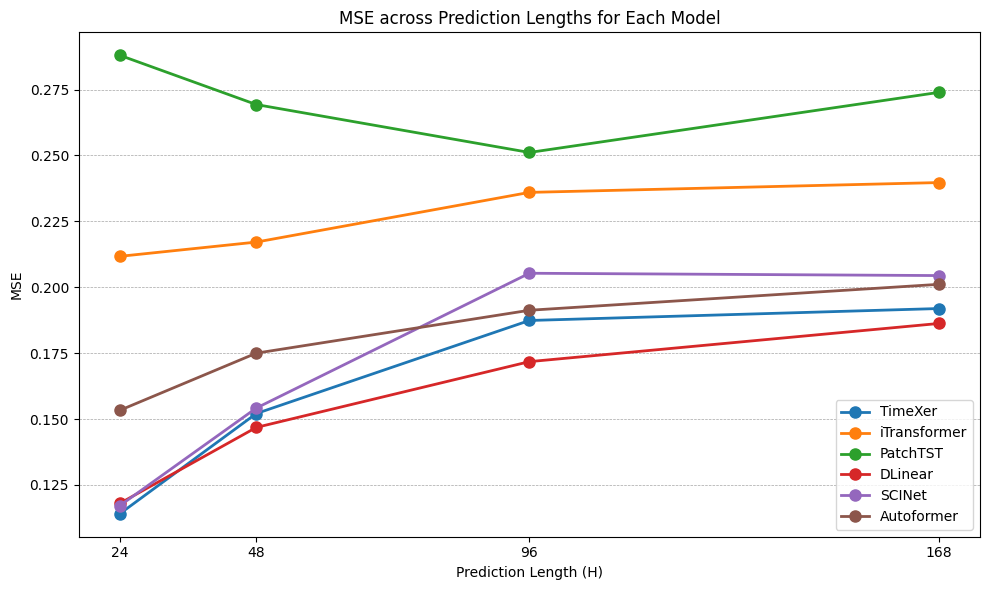

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set your original font and style
plt.rcParams['font.family'] = 'Palatino Linotype'
plt.ioff()
plt.style.use('default')

# Set seaborn color palette
palette = sns.color_palette('tab10', n_colors=len(df['model'].unique()))

plt.figure(figsize=(10, 6))

for idx, model in enumerate(df['model'].unique()):
    # Drop '_168' from model name for labeling
    display_name = model.replace('_168', '')
    
    model_data = df[df['model'] == model]
    plt.plot(
        model_data['pred_len'], 
        model_data['MSE'], 
        marker='o', 
        markersize=8,
        linewidth=2,
        label=display_name, 
        color=palette[idx]
    )

plt.xlabel('Prediction Length (H)')
plt.ylabel('MSE')
plt.title('MSE across Prediction Lengths for Each Model')
plt.xticks([24, 48, 96, 168])

# Cool horizontal gridlines
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

plt.legend()
plt.tight_layout()
plt.show()

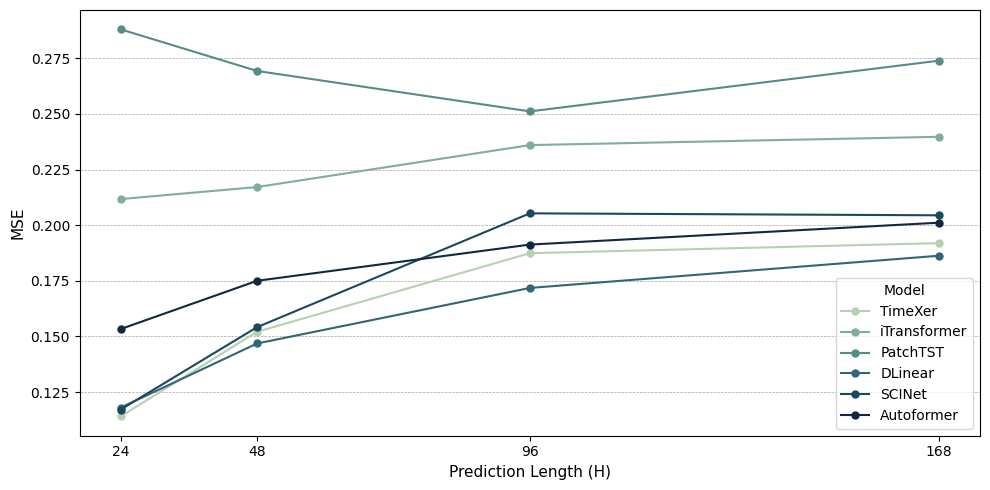

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Use Palatino font for LaTeX thesis
plt.rcParams['font.family'] = 'Palatino'
plt.ioff()
plt.style.use('default')

# Drop '_168' from model names for display
df['clean_model'] = df['model'].str.replace('_168', '')

# Set vibrant colors
# palette = ['royalblue', 'red', 'lime', 'gold', '#FF7F0E', 'cyan', 'magenta', 'darkviolet']
palette = [
    '#b5d1ae',  # Teal 1 (lightest)
    '#80ae9a',  # Teal 2
    '#568b87',  # Teal 3
    '#326677',  # Teal 4
    '#1b485e',  # Teal 5
    '#122740'   # Teal 6 (darkest)
]

# Create a longer/wider figure
plt.figure(figsize=(10, 5))  # wider (12), same height (5)

for idx, model in enumerate(df['model'].unique()):
    model_data = df[df['model'] == model]
    plt.plot(
        model_data['pred_len'],
        model_data['MSE'],
        marker='o',
        markersize=5,
        linewidth=1.5,
        label=model.replace('_168', ''),
        color=palette[idx % len(palette)]
    )

# Labels
plt.xlabel('Prediction Length (H)', fontsize=11)
plt.ylabel('MSE', fontsize=11)

# Axes, spines, legend
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(0.8)

plt.xticks([24, 48, 96, 168])
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# Save high-res figure (uncomment to save)
# plt.savefig('mse_prediction_length_comparison.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

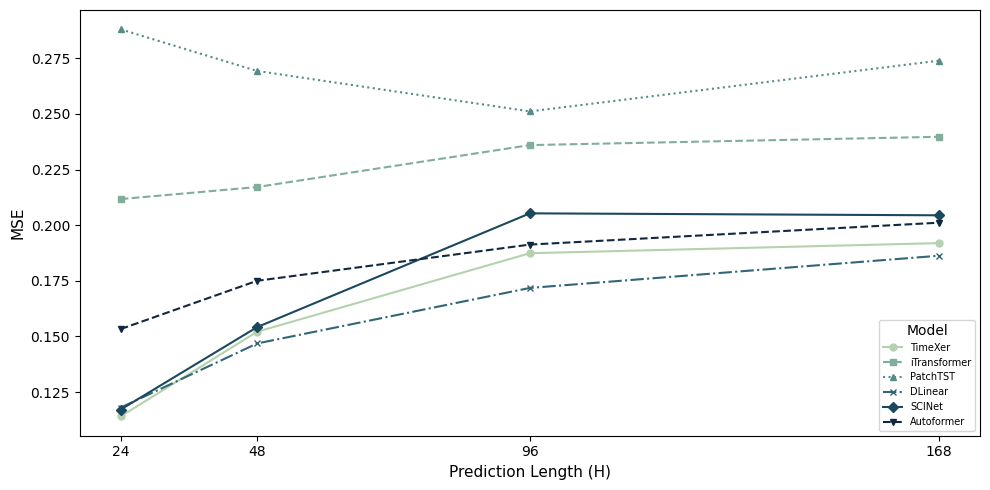

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Use Palatino font for thesis
plt.rcParams['font.family'] = 'Palatino'
plt.ioff()
plt.style.use('default')

# Drop '_168' from model names
df['clean_model'] = df['model'].str.replace('_168', '')

# Define muted color palette
colors = [
    '#b5d1ae',  # Teal 1 (lightest)
    '#80ae9a',  # Teal 2
    '#568b87',  # Teal 3
    '#326677',  # Teal 4
    '#1b485e',  # Teal 5
    '#122740'   # Teal 6 (darkest)
]

# Define line styles and markers
line_styles = ['solid', 'dashed', 'dotted', 'dashdot']
markers = ['o', 's', '^', 'x', 'D', 'v', '<', '>']

plt.figure(figsize=(10, 5))

for idx, model in enumerate(df['model'].unique()):
    model_data = df[df['model'] == model]
    plt.plot(
        model_data['pred_len'],
        model_data['MSE'],
        marker=markers[idx % len(markers)],
        markersize=5,
        linewidth=1.5,
        linestyle=line_styles[idx % len(line_styles)],
        label=model.replace('_168', ''),
        color=colors[idx % len(colors)]
    )

plt.xlabel('Prediction Length (H)', fontsize=11)
plt.ylabel('MSE', fontsize=11)

# Axes and legend
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(0.8)

plt.xticks([24, 48, 96, 168])
plt.legend(title='Model', loc='lower right', fontsize=7, title_fontsize=10)
plt.grid(False)
plt.savefig('mse_pred_len.png', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()

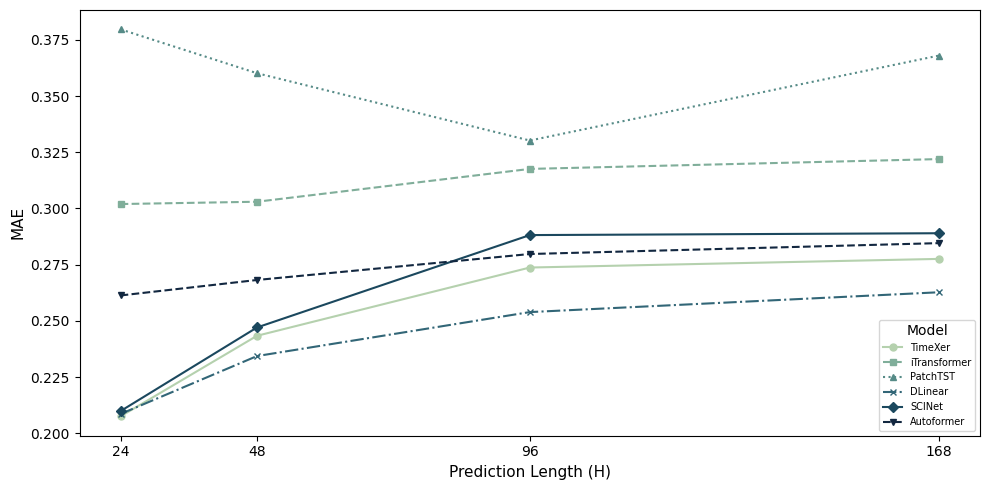

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Use Palatino font for thesis
plt.rcParams['font.family'] = 'Palatino'
plt.ioff()
plt.style.use('default')

# Drop '_168' from model names
df['clean_model'] = df['model'].str.replace('_168', '')

# Define muted color palette
colors = [
    '#b5d1ae',  # Teal 1 (lightest)
    '#80ae9a',  # Teal 2
    '#568b87',  # Teal 3
    '#326677',  # Teal 4
    '#1b485e',  # Teal 5
    '#122740'   # Teal 6 (darkest)
]

# Define line styles and markers
line_styles = ['solid', 'dashed', 'dotted', 'dashdot']
markers = ['o', 's', '^', 'x', 'D', 'v', '<', '>']

plt.figure(figsize=(10, 5))

for idx, model in enumerate(df['model'].unique()):
    model_data = df[df['model'] == model]
    plt.plot(
        model_data['pred_len'],
        model_data['MAE'],
        marker=markers[idx % len(markers)],
        markersize=5,
        linewidth=1.5,
        linestyle=line_styles[idx % len(line_styles)],
        label=model.replace('_168', ''),
        color=colors[idx % len(colors)]
    )

plt.xlabel('Prediction Length (H)', fontsize=11)
plt.ylabel('MAE', fontsize=11)

# Axes and legend
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(0.8)

plt.xticks([24, 48, 96, 168])
plt.legend(title='Model', loc='lower right', fontsize=7, title_fontsize=10)
plt.grid(False)
plt.savefig('mae_pred_len.png', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()

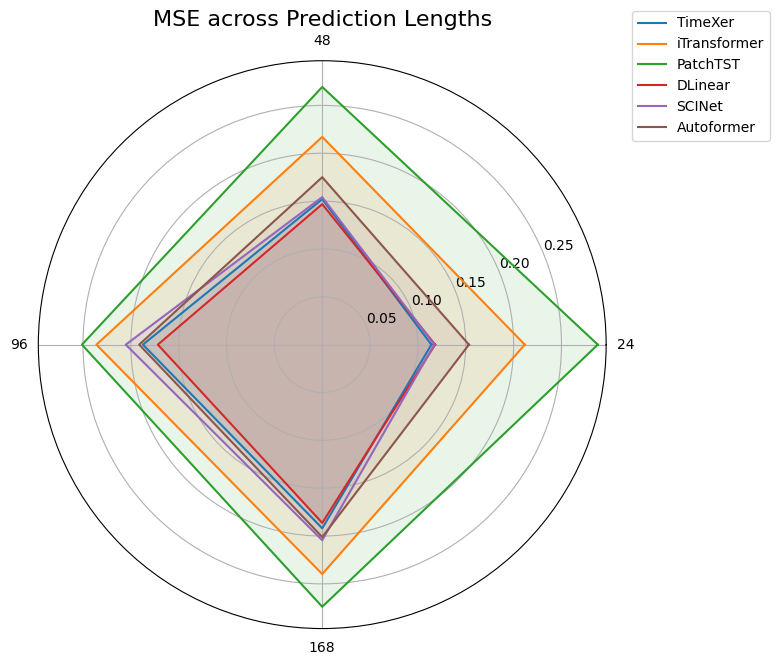

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('pred_len.csv')

# Extract model and prediction length from model_id
df[['model', 'pred_len']] = df['model_id'].str.rsplit('_', n=1, expand=True)
df['pred_len'] = df['pred_len'].astype(int)

# Remove '_168' from model names for display
df['clean_model'] = df['model'].str.replace('_168', '')

# Set up radar chart variables
labels = [24, 48, 96, 168]
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the circle

# Start the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each model with cleaned name
for model in df['model'].unique():
    clean_name = model.replace('_168', '')
    model_data = df[df['model'] == model].sort_values('pred_len')
    values = model_data['MSE'].tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, label=clean_name)
    ax.fill(angles, values, alpha=0.1)

# Set the axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title('MSE across Prediction Lengths', fontsize=16)

# Add gridlines and legend
ax.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.savefig('mse_pred_len_radar.png', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()

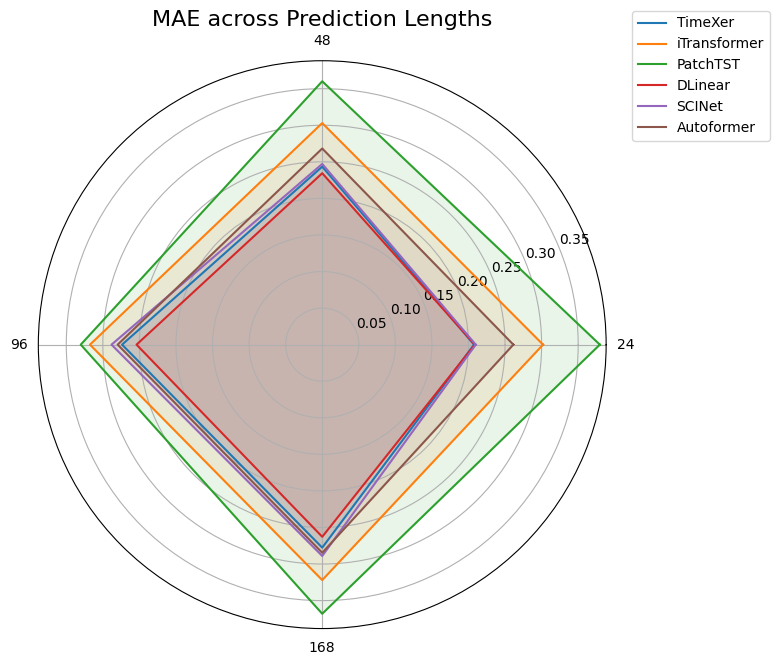

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('pred_len.csv')

# Extract model and prediction length from model_id
df[['model', 'pred_len']] = df['model_id'].str.rsplit('_', n=1, expand=True)
df['pred_len'] = df['pred_len'].astype(int)

# Remove '_168' from model names for display
df['clean_model'] = df['model'].str.replace('_168', '')

# Set up radar chart variables
labels = [24, 48, 96, 168]
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the circle

# Start the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each model with cleaned name
for model in df['model'].unique():
    clean_name = model.replace('_168', '')
    model_data = df[df['model'] == model].sort_values('pred_len')
    values = model_data['MAE'].tolist()
    values += values[:1]  # close the loop
    ax.plot(angles, values, label=clean_name)
    ax.fill(angles, values, alpha=0.1)

# Set the axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title('MAE across Prediction Lengths', fontsize=16)

# Add gridlines and legend
ax.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.savefig('mae_pred_len_radar.png', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()